# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding
Version 0.250311.2145

**Important Disclaimer:** This notebook was primarily AI-generated and has not been fully verified by human experts. Please exercise caution when interpreting the code, results, or any conclusions drawn. Independent verification is recommended.

## Overview of the Dandiset

This Dandiset, [DANDI:000563 (version 0.250311.2145)](https://dandiarchive.org/dandiset/000563/0.250311.2145), titled "Allen Institute Openscope - Barcoding," focuses on understanding how visual neurons, particularly in cortical visual areas and the visual stream through the superior colliculus, respond to white noise flicker visual stimuli. The experiment used Neuropixels probes to record neural activity in mice presented with these stimuli. The dataset aims to provide "barcodes" (characteristic neural response patterns) for visually responsive neurons, which could potentially be used to identify discrete cell types.

Key aspects include:
- **Species:** Mouse (Mus musculus)
- **Techniques:** Neuropixels extracellular electrophysiology, optotagging.
- **Stimuli:** White noise flicker (full field or contrast-modulated static gratings).
- **Data measured:** Local Field Potentials (LFP), ElectricalSeries (raw ephys), ProcessingModule data, OptogeneticSeries, and Units (spike sorted data).

For more details, please refer to the [Dandiset summary on DANDI Archive](https://dandiarchive.org/dandiset/000563/0.250311.2145/metadata).

## What this notebook covers

This notebook will guide you through:
1. Listing required Python packages.
2. Connecting to the DANDI archive and retrieving basic information about the Dandiset.
3. Loading a specific NWB (Neurodata Without Borders) file from this Dandiset.
4. Displaying some basic metadata from the NWB file.
5. Exploring and visualizing select data types within the NWB file, including:
    - Pupil tracking data (pupil area).
    - Running speed.
    - Spike times from sorted neuronal units (raster plot).
6. Providing a brief summary and suggesting potential future analysis directions.

## Required Packages

To run this notebook, you will need the following Python packages installed. We assume they are already available in your environment.

- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for reading NWB files)
- `h5py` (dependency for pynwb, for HDF5 file operations)
- `remfile` (for streaming remote HDF5 files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `pandas` (for data manipulation, e.g., smoothing)
- `seaborn` (for enhanced plot styling)

## Connecting to DANDI and Loading Dandiset Information

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for plotting
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000563"
dandiset_version = "0.250311.2145"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')[:200]}...") # First 200 chars

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Corrected to asset.identifier

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145
Dandiset description: Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise sti...

First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


## Loading a Specific NWB File

This Dandiset contains multiple NWB files, often one for optogenetic stimuluation (`_ogen.nwb`) and several for electrophysiology from different probes (`_probe-X_ecephys.nwb`) per session.

For this demonstration, we will load the NWB file `sub-681446/sub-681446_ses-1290510496_ogen.nwb`. This file primarily contains optogenetic stimulation data and associated behavioral tracking like eye movements and running speed.

The asset ID for this file is `2f2ac304-83a3-4352-8612-5f34b68062a0`. We will use its direct download URL to load it.

In [2]:
# URL for the selected NWB file
nwb_asset_id = "2f2ac304-83a3-4352-8612-5f34b68062a0"
nwb_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"Loading NWB file from: {nwb_url}")

# Load the NWB file using remfile for remote streaming
remote_nwb_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_nwb_file, 'r') # Ensure read mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read and NWBHDF5IO takes file object
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Session Description: {nwbfile.session_description}")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session Start Time: {nwbfile.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Session Description: Data and metadata for an Ecephys session
Identifier: 1290510496
Session Start Time: 2023-08-16 00:00:00-07:00


## Exploring the NWB File Contents

NWB files have a hierarchical structure. Key information is often found in `acquisition` (raw acquired data), `processing` (processed data), `stimulus` (stimulus information), and `units` (spike data).

You can explore the structure of this NWB file interactively using tools like [Neurosift](https://neurosift.app).
Here's a direct link to explore this specific NWB file on Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/&dandisetId=000563&dandisetVersion=0.250311.2145](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/&dandisetId=000563&dandisetVersion=0.250311.2145)

Let's look at some specific data types present in this `_ogen.nwb` file.

### Pupil Tracking Data

The NWB file contains eye tracking data, including pupil metrics. Let's plot a segment of the pupil area over time. The `nwb-file-info` tool indicated that `nwbfile.acquisition['EyeTracking'].pupil_tracking` is an `EllipseSeries` and its `unit` is 'meters'. While 'meters' is unusual for pupil area (likely pixels or arbitrary units), we will use the unit as specified in the file.

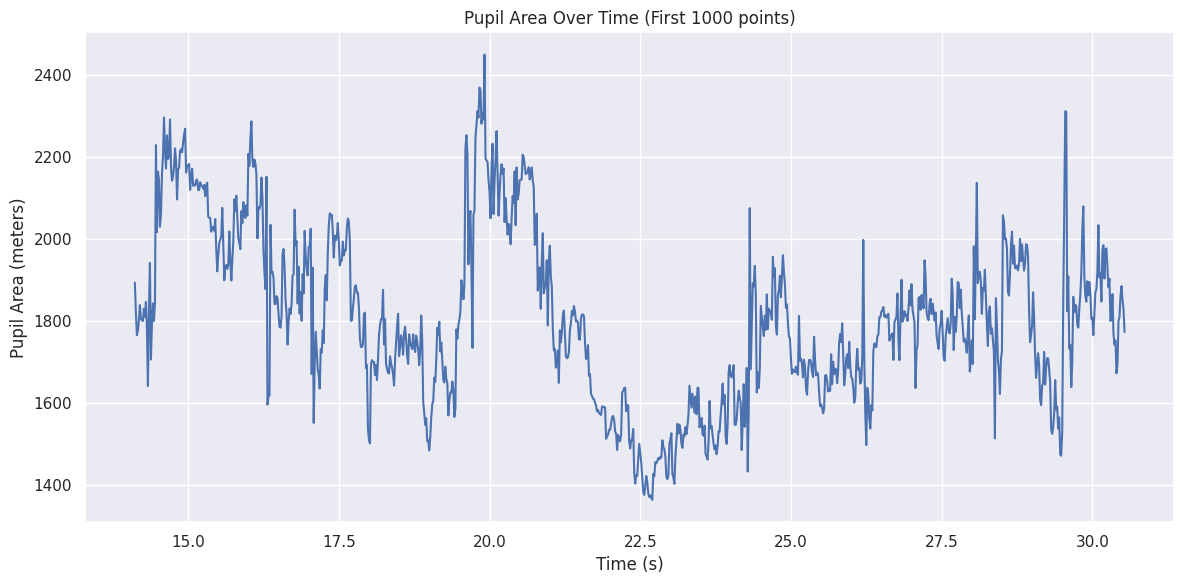

Displayed pupil area for the first 1000 data points.


In [3]:
# Access pupil tracking data
try:
    pupil_tracking = nwbfile.acquisition['EyeTracking'].pupil_tracking
    pupil_area_data = pupil_tracking.area
    pupil_timestamps = pupil_tracking.timestamps
    pupil_area_unit = pupil_tracking.unit # Unit is on the EllipseSeries

    # Select a segment of data (e.g., first 1000 points)
    num_points_to_plot = 1000
    if len(pupil_area_data) > num_points_to_plot:
        segment_pupil_area = pupil_area_data[:num_points_to_plot]
        segment_pupil_timestamps = pupil_timestamps[:num_points_to_plot]
    else:
        segment_pupil_area = pupil_area_data[:]
        segment_pupil_timestamps = pupil_timestamps[:]

    plt.figure(figsize=(12, 6))
    plt.plot(segment_pupil_timestamps, segment_pupil_area)
    plt.xlabel("Time (s)")
    plt.ylabel(f"Pupil Area ({pupil_area_unit})")
    plt.title(f"Pupil Area Over Time (First {len(segment_pupil_area)} points)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f"Displayed pupil area for the first {len(segment_pupil_area)} data points.")

except KeyError:
    print("Pupil tracking data ('EyeTracking') not found in nwbfile.acquisition.")
except Exception as e:
    print(f"An error occurred while plotting pupil data: {e}")

The plot above shows fluctuations in pupil area over a short time segment, demonstrating how to access and visualize this type of behavioral data.

### Running Speed

The file also contains running speed data, typically found in `nwbfile.processing['running']`. Let's plot a segment of this. Raw running speed can be noisy, so we'll also show a smoothed version using a moving average.

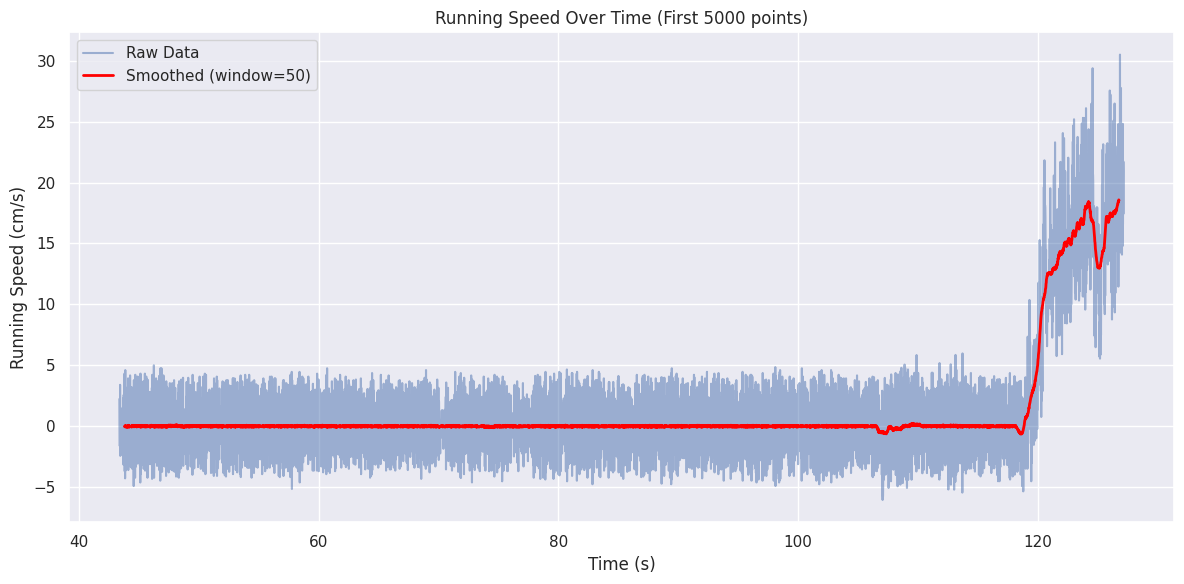

Displayed raw and smoothed running speed for the first 5000 points.


In [4]:
try:
    running_module = nwbfile.processing.get('running')
    if running_module is not None:
        running_speed_ts = running_module.data_interfaces.get('running_speed')
        if running_speed_ts is not None:
            running_speed_data = running_speed_ts.data
            running_speed_timestamps = running_speed_ts.timestamps
            running_speed_unit = running_speed_ts.unit

            # Select a segment (e.g., first 5000 points for smoothing context)
            num_points_to_plot_run = 5000
            if len(running_speed_data) > num_points_to_plot_run:
                segment_running_speed_raw = running_speed_data[:num_points_to_plot_run]
                segment_run_timestamps = running_speed_timestamps[:num_points_to_plot_run]
            else:
                segment_running_speed_raw = running_speed_data[:]
                segment_run_timestamps = running_speed_timestamps[:]

            # Smooth the data
            window_size = 50
            # Ensure segment_running_speed_raw is a NumPy array for pd.Series
            segment_running_speed_series = pd.Series(np.array(segment_running_speed_raw))
            smoothed_running_speed = segment_running_speed_series.rolling(window=window_size, center=True).mean().to_numpy()

            plt.figure(figsize=(12, 6))
            plt.plot(segment_run_timestamps, segment_running_speed_raw, label='Raw Data', alpha=0.5)
            plt.plot(segment_run_timestamps, smoothed_running_speed, label=f'Smoothed (window={window_size})', color='red', linewidth=2)
            plt.xlabel("Time (s)")
            plt.ylabel(f"Running Speed ({running_speed_unit})")
            plt.title(f"Running Speed Over Time (First {len(segment_running_speed_raw)} points)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            print(f"Displayed raw and smoothed running speed for the first {len(segment_running_speed_raw)} points.")
        else:
            print("TimeSeries 'running_speed' not found in 'running' processing module.")
    else:
        print("Processing module 'running' not found in nwbfile.processing.")
except Exception as e:
    print(f"An error occurred while plotting running speed: {e}")

The smoothed running speed (red line) in the plot above more clearly shows periods of activity and stillness compared to the noisy raw data.

### Spike Data (Units)

This `_ogen.nwb` file also contains sorted spike data in `nwbfile.units`. We can visualize the activity of a few selected units using a raster plot.
A raster plot shows spike times for multiple neurons over a period. Each row typically corresponds to a neuron, and each tick mark indicates a spike.

Units table loaded with 2572 units. Columns: ['isi_violations', 'isolation_distance', 'PT_ratio', 'snr', 'spread', 'local_index', 'cluster_id', 'waveform_halfwidth', 'cumulative_drift', 'velocity_above', 'l_ratio', 'waveform_duration', 'repolarization_slope', 'amplitude', 'amplitude_cutoff', 'recovery_slope', 'velocity_below', 'd_prime', 'max_drift', 'peak_channel_id', 'quality', 'silhouette_score', 'nn_hit_rate', 'presence_ratio', 'firing_rate', 'nn_miss_rate', 'spike_times', 'spike_amplitudes', 'waveform_mean']


Plotting raster for 5 units: ['18', '19', '20', '21', '22']


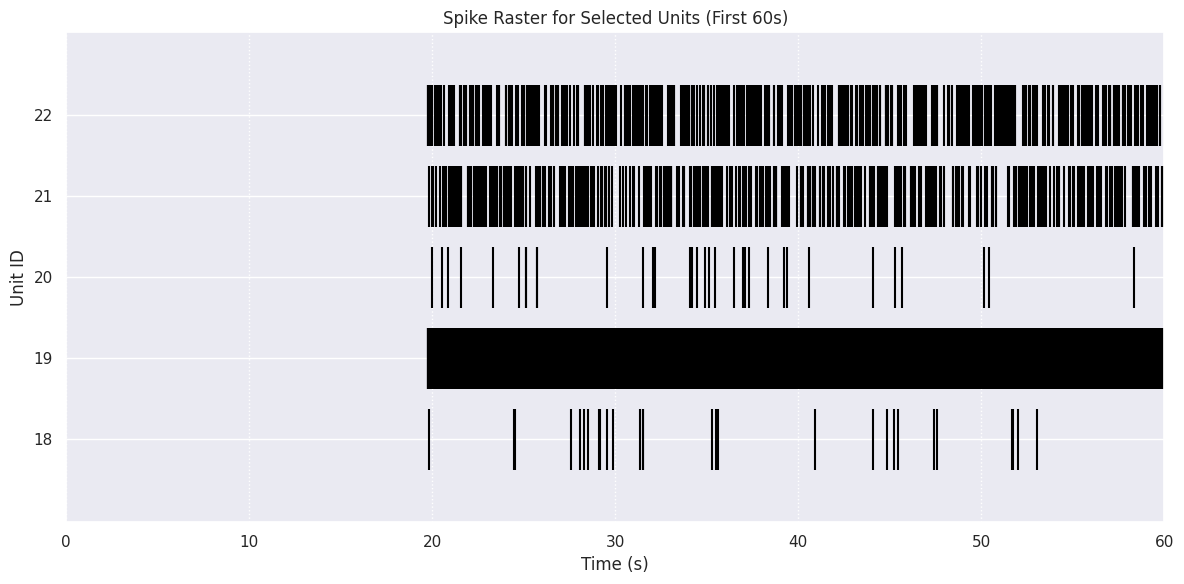

In [5]:
try:
    if nwbfile.units is not None and len(nwbfile.units.id[:]) > 0:
        units_df = nwbfile.units.to_dataframe() # Useful for seeing available unit metadata
        print(f"Units table loaded with {len(units_df)} units. Columns: {list(units_df.columns)}")
        
        selected_spike_times_for_plot = []
        selected_unit_ids_for_plot = []
        num_units_plotted = 0
        max_units_to_try_plot = min(20, len(nwbfile.units.id[:])) # Try up to 20 units
        target_num_units_plot = 5

        for i in range(max_units_to_try_plot):
            if num_units_plotted >= target_num_units_plot:
                break
            try:
                # spike_times_index directly accesses linked VectorData
                unit_spike_times = nwbfile.units.spike_times_index[i][:]
                unit_id = nwbfile.units.id[i]
                if len(unit_spike_times) > 10: # Only plot units with some activity
                    selected_spike_times_for_plot.append(unit_spike_times)
                    selected_unit_ids_for_plot.append(str(unit_id)) # Use string for categorical plotting
                    num_units_plotted += 1
            except Exception as e_unit:
                print(f"Could not process unit at index {i} (ID: {nwbfile.units.id[i]}): {e_unit}")
                continue

        if not selected_spike_times_for_plot:
            print("No units with sufficient spikes found to plot a raster.")
        else:
            print(f"Plotting raster for {len(selected_unit_ids_for_plot)} units: {selected_unit_ids_for_plot}")
            
            plt.figure(figsize=(12, 6))
            plt.eventplot(selected_spike_times_for_plot, linelengths=0.75, colors='black')
            plt.yticks(np.arange(len(selected_unit_ids_for_plot)), selected_unit_ids_for_plot)
            plt.xlabel("Time (s)")
            plt.ylabel("Unit ID")
            
            max_time_spike_plot = 0
            for st in selected_spike_times_for_plot:
                if len(st) > 0:
                    max_time_spike_plot = max(max_time_spike_plot, np.max(st))
            
            plot_duration = 60.0 # seconds
            if max_time_spike_plot > plot_duration:
                plt.xlim(0, plot_duration)
                plt.title(f"Spike Raster for Selected Units (First {plot_duration:.0f}s)")
            else:
                plt.title(f"Spike Raster for Selected Units")

            plt.grid(True, axis='x', linestyle=':')
            plt.tight_layout()
            plt.show()
    else:
        print("No units data found in this NWB file or units table is empty.")
except Exception as e:
    print(f"An error occurred while plotting spike raster: {e}")

The raster plot above shows the firing patterns of a few selected neuronal units. Different units can exhibit vastly different firing rates and temporal patterns, as seen with some units firing densely and others more sparsely. Unit 19 in the exploration script was particularly active; the selection here might differ but illustrates the concept.

## Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI Archive and retrieve Dandiset metadata.
- Load a specific NWB file from Dandiset 000563.
- Access and visualize basic metadata and several types of data within the NWB file, including pupil area, running speed, and neuronal spike times.

### Possible Future Directions:

1.  **Correlate Neural Activity with Behavior:** Analyze how neural firing patterns (e.g., from `Units` or LFP data in `_ecephys.nwb` files) correlate with behavioral variables like running speed or pupil dilation.
2.  **Stimulus-Evoked Responses:** Investigate neural responses to specific visual stimuli detailed in `nwbfile.intervals` (e.g., `RepeatFFF_presentations`, `UniqueFFF_presentations`). This would typically involve aligning spike times or LFP data to stimulus onset times. The current `_ogen.nwb` file focuses less on ephys data, so exploring corresponding `_ecephys.nwb` files would be crucial for this.
3.  **Optogenetic Effects:** If analyzing data where optogenetic stimulation was applied (see `nwbfile.processing['optotagging']`), one could study how stimulation affects neural activity and behavior.
4.  **Cross-Probe Analysis:** For sessions with multiple probe recordings (multiple `_ecephys.nwb` files), compare neural activity across different recorded brain regions.
5.  **Advanced Visualizations:** Create more sophisticated plots, such as peri-stimulus time histograms (PSTHs), heatmaps of neural activity, or population-level analyses.

Remember that the `_ogen.nwb` file explored here is primarily for optogenetic tagging and associated behavioral data. For in-depth neural response analysis, one would typically load the corresponding `_ecephys.nwb` files from this Dandiset, which contain the raw electrophysiology and more detailed spike-sorted unit information from the Neuropixels probes.

In [6]:
# Close the HDF5 file and remfile
# It's good practice, though Jupyter notebooks often handle this implicitly on kernel shutdown.
try:
    io.close() # This also closes the h5_file and subsequently the remote_file if opened by NWBHDF5IO
    print("NWB IO, HDF5 file, and remote file handles closed.")
except NameError:
    print("IO object not defined, likely due to an earlier error in file loading.")
except Exception as e:
    print(f"Error closing file handles: {e}")

NWB IO, HDF5 file, and remote file handles closed.
